In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class bandit:
    
    def __init__(self,prob):
        self.prob = prob
        self.qValue = 0
        self.count = 0
        
    def pull(self):
        return np.random.random()<self.prob
    
    
    def update(self,reward):
        self.count = self.count + 1
        self.qValue = self.qValue + ( (reward - self.qValue)/self.count)

            

Recursive formula for updating the sample mean 

$ 
\hat{r}_N = \frac{1}{N} \sum_{i=1}^{N} = \frac {1}{N} (\sum_{i=1}^{N-1} r_i + r_N)  \newline
\hat{r}_{N-1} \sum_{i=1}^{N-1} r_i  \newline
\rightarrow \hat{Q}_N = \hat{Q}_{N-1} + \frac{1}{N} (r_N - \hat{Q}_{N-1})
$

In [4]:
############## E-GREEDY ALGORITHM ################
def eGreedy(qValues,epsilon):
    if np.random.uniform() < epsilon  :
        arm = np.random.randint(len(qValues))
    else:
        arm = np.argmax(qValues)    
    return arm
      

Q values:  [0.19914040114613185, 0.4800000000000001, 0.7435749683070182]
Best arm out of 3 arm is:  3
num of times selected optimal bandit:  8677
total reward is:  6891.0
Win rate:  0.6891


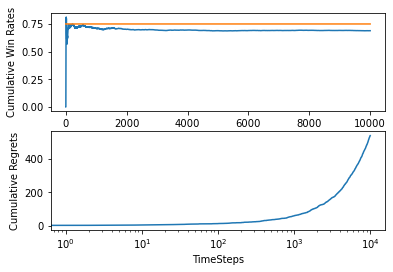

In [91]:
############ TEST CASE#################
epsilon = 0.2
NUM_TRIALS = 10000
banditsProbs = [0.2, 0.5, 0.75]
rewards = np.zeros(NUM_TRIALS)
regrets = np.zeros(NUM_TRIALS)


bandits = [bandit(x) for x in banditsProbs]
optimalArm = np.argmax([b.prob for b in bandits])
numOfOptimal = 0
i=0
while i < NUM_TRIALS :
    #epsilon = 1/np.log(i)
    #epsilon = 1/(i+1)
    arm = eGreedy([b.qValue for b in bandits] ,epsilon)
    curReward = bandits[arm].pull()
    bandits[arm].update(curReward)
    rewards[i] = curReward
    regrets[i] = banditsProbs[optimalArm] - banditsProbs[arm]
    if arm == optimalArm:
        numOfOptimal +=1
    i=i+1
    
    
    

print("Q values: " ,[b.qValue for b in bandits])
print("Best arm out of",len(bandits) ,"arm is: ", np.argmax([b.qValue for b in bandits])+1 )
print("num of times selected optimal bandit: ",numOfOptimal)        
print("total reward is: ",rewards.sum())
print("Win rate: ",rewards.sum()/NUM_TRIALS)

cumulativeRewards = np.cumsum(rewards)
winRates = cumulativeRewards/(np.arange(NUM_TRIALS)+1)

plt.subplot(2,1,1)
plt.plot(winRates)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Win Rates")
plt.plot(np.ones(NUM_TRIALS)*np.max(banditsProbs))

regrets = np.cumsum(regrets) #cumulative rewards loss due to the need of learning
plt.subplot(2,1,2)
plt.plot(regrets)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Regrets")
plt.show()

Q values:  [0.2571428571428571, 0.4722222222222222, 0.7456944304562388]
Best arm out of 3 arm is:  3
num of times selected optimal bandit:  9929
total reward is:  7430.0
Win rate:  0.743


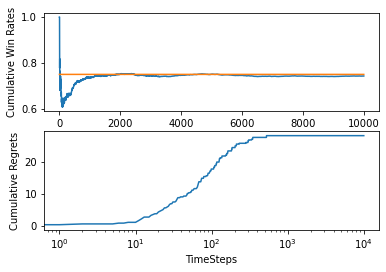

In [90]:
#Decaying alpha
NUM_TRIALS = 10000
banditsProbs = [0.2, 0.5, 0.75]
rewards = np.zeros(NUM_TRIALS)
regrets = np.zeros(NUM_TRIALS)


bandits = [bandit(x) for x in banditsProbs]
optimalArm = np.argmax([b.prob for b in bandits])
numOfOptimal = 0
i=0
while i < NUM_TRIALS :
    #epsilon = 1/np.log(i)
    #epsilon = 1/(i+1)
    epsilon = 0.99**i
    arm = eGreedy([b.qValue for b in bandits] ,epsilon)
    curReward = bandits[arm].pull()
    bandits[arm].update(curReward)
    rewards[i] = curReward
    regrets[i] = banditsProbs[optimalArm] - banditsProbs[arm]
    if arm == optimalArm:
        numOfOptimal +=1
    i=i+1
    
    
    

print("Q values: " ,[b.qValue for b in bandits])
print("Best arm out of",len(bandits) ,"arm is: ", np.argmax([b.qValue for b in bandits])+1 )
print("num of times selected optimal bandit: ",numOfOptimal)        
print("total reward is: ",rewards.sum())
print("Win rate: ",rewards.sum()/NUM_TRIALS)

cumulativeRewards = np.cumsum(rewards)
winRates = cumulativeRewards/(np.arange(NUM_TRIALS)+1)

plt.subplot(2,1,1)
plt.plot(winRates)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Win Rates")
plt.plot(np.ones(NUM_TRIALS)*np.max(banditsProbs))

regrets = np.cumsum(regrets) #cumulative rewards loss due to the need of learning
plt.subplot(2,1,2)
plt.plot(regrets)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Regrets")
plt.show()